# 0.0. IMPORTS

## 0.1. Import Frameworks

In [1]:
# manipulation
import pandas as pd
import numpy as np
import inflection

# plot
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2. Helper Functions

In [149]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    sns.set()
    
# Plot categorical attributes with annot
def plot_cat(att, annot=True):
    
    splot = sns.countplot(x = cat_attributes[att])

    if annot == True:
        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', xytext = (0, 10), 
                           textcoords = 'offset points')

In [134]:
jupyter_settings()

## 0.3. Import Data

In [135]:
# data url
url = 'https://raw.githubusercontent.com/tadeucbm/churn_predict/main/data/churn.csv'

# df is data
df = pd.read_csv(url).drop(['RowNumber', 'CustomerId'], axis=1)

In [136]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1.0. DATA DESCRIPTION

In [137]:
# copy df to next section
df1 = df.copy()

## 1.1. Rename Columns

In [138]:
# select columns
cols_old = df1.columns.to_list()

# anonymous function to underscore columns
snakecase = lambda x: inflection.underscore(x)

# create new column names
cols_new = list(map(snakecase, cols_old))

# rename
df1.columns = cols_new

In [139]:
# print columns
df1.columns

Index(['surname', 'credit_score', 'geography', 'gender', 'age', 'tenure',
       'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

## 1.2. Data Dimension

In [140]:
# print the number of rows
print(f'Number of rows: {df1.shape[0]}')

# print the number of columns
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 10000
Number of columns: 12


## 1.3. Data Types

In [141]:
# view dtypes
df1.dtypes

surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

In [142]:
# turning binary variables into objects
df1 = df1.astype({'num_of_products': 'object', 'has_cr_card': 'object', 
                  'is_active_member': 'object', 'exited': 'object', 
                  'tenure': 'object'})

## 1.4. Check NA

In [143]:
df1.isna().sum()

surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## 1.5. Descriptive Statistics

In [144]:
# df with only numerical attributes
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

# df with only categorical attributes
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 1.5.1. Numerical Attributes

In [145]:
# Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
ct = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
ct.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,credit_score,350.00,850.00,500.00,650.528800,652.000,96.648466,-0.071607,-0.425726
1,age,18.00,92.00,74.00,38.921800,37.000,10.487282,1.011320,1.395347
2,balance,0.00,250898.09,250898.09,76485.889288,97198.540,62394.285254,-0.141109,-1.489412
3,estimated_salary,11.58,199992.48,199980.90,100090.239881,100193.915,57507.617221,0.002085,-1.181518


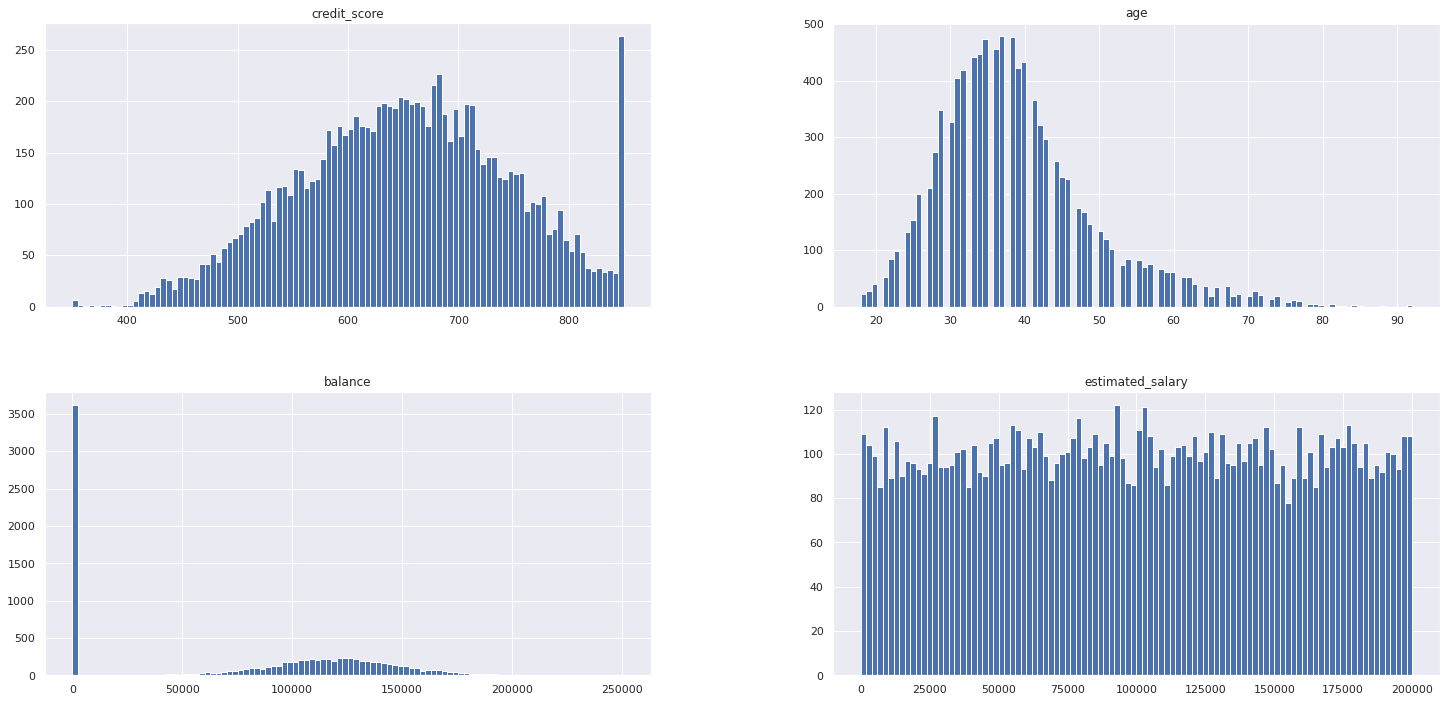

In [146]:
# plot histograms
num_attributes.hist(bins=100);

### 1.5.2. Categorical Attributes

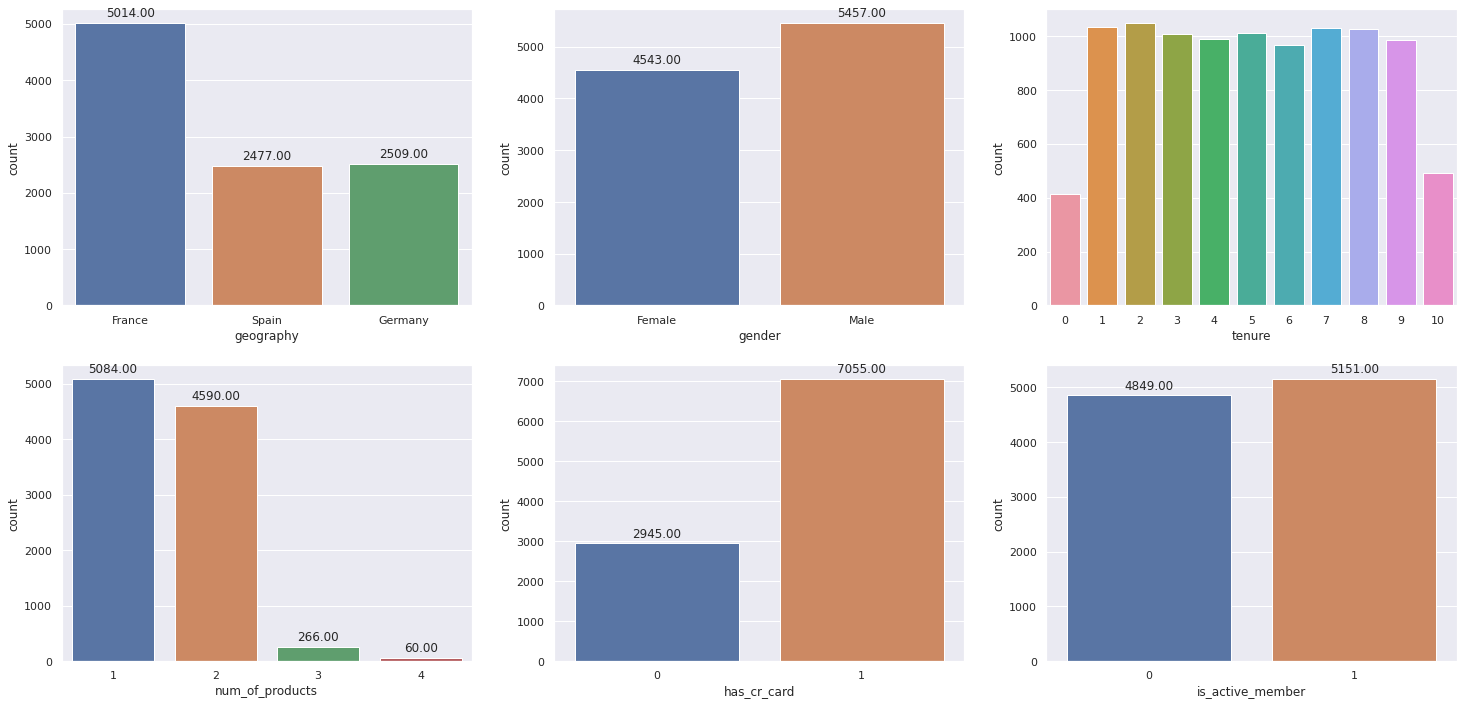

In [153]:
# create grid
grid = plt.GridSpec(2, 3)

# print countplot geography
plt.subplot(grid[0, 0])
plot_cat('geography')

# print countplot gender
plt.subplot(grid[0, 1])
plot_cat('gender')

# print countplot tenure
plt.subplot(grid[0, 2])
plot_cat('tenure', annot=False)

# print countplot num_of_products
plt.subplot(grid[1, 0])
plot_cat('num_of_products')

# print countplot has_cr_card
plt.subplot(grid[1, 1])
plot_cat('has_cr_card')

# print countplot is_active_member
plt.subplot(grid[1, 2])
plot_cat('is_active_member')

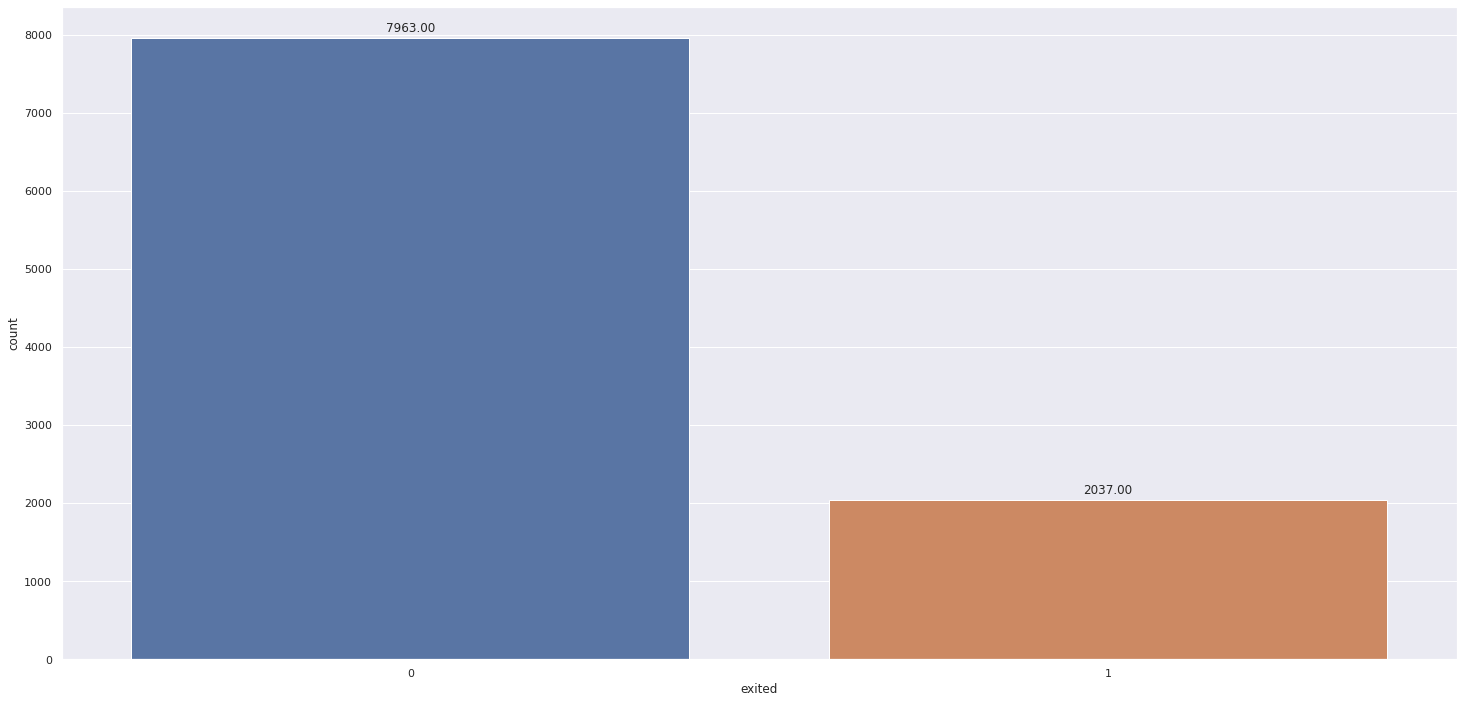

In [152]:
# variable target
plot_cat('exited')

obs: very umbalaced variable response

# 2.0. FEATURE ENGINEERING